In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## 1. Load data

In [2]:
file = "/Users/danichao/self_data/customer_churn.csv"
churn_data = pd.read_csv(file)

churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2. Data exploration

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
ERROR! Session/line number was not unique in database. History logging moved to new session 71

For analysis, we do not need `RowNumber`, `CustomerId`, and `Surname`, but I keep it for long-term purpose - when we come up with marketing campaigns based on the analysis, we can apply the campaigns directly to the corresponding customers. 

In [4]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Good that there is no missing data, but we have to convert categorical features (`Gender`) into binary variables.

In [5]:
churn_data['Gender'] = churn_data['Gender'].map({'Female': 0, 'Male': 1})
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


#### 2.1 Brief analysis

In [6]:
total_churn_rate = churn_data['Exited'].value_counts()/churn_data.shape[0]
print('Total churn rate:', total_churn_rate)

Total churn rate: Exited
0    0.7963
1    0.2037
Name: count, dtype: float64


Around 20% of customers quit the bank, and we need to check what is the difference between the customers keeping using the bank and the customers quitting the bank. I start with the common values like mean and median.

In [7]:
churn_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1).groupby('Exited').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,
0,651.853196,0.572523,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,0.440844,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [8]:
churn_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1).groupby('Exited').median()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,
0,653.0,1.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,646.0,0.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


Some guess/inspection:
- Customers who keep using the bank have higher credit score than those who quit
- However, customers who quit the bank have higher balance and higher estimated salary
- Since customers who quit the bank are apparently older than those who keep using the bank, a possilbe explanation is that these older customers have low demand on loans and favor cash over credit card, which results in lower credit score. While the bank might focus more on card and loan products, attracting younger people who are relatively struggling in finance or planning to buy their first car/house, the older customers expect the bank to offer stable investment options, such as higher interest rates and reliable portfolio solution.
- ***Another factor for the apparent age difference is that many old customers quit the bank because they pass away.***

It is also interesting that most of the customers who quit the bank are female, and most of the customers who keep using the bank are male.

#### 2.2 Visualization

I visualize the feature distribution here.

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
def FeatureDistribution(feature):
    fig = plt.figure(figsize=(8,3.5))
    sns.kdeplot(churn_data.loc[churn_data['Exited'] == 0, feature], color='b', shade=True, label="Stay")
    sns.kdeplot(churn_data.loc[churn_data['Exited'] == 1, feature], color='r', shade=True, label="Quit",)
    plt.xlabel(feature)
    plt.ylabel('kernel density')
    plt.legend()
    plt.show()

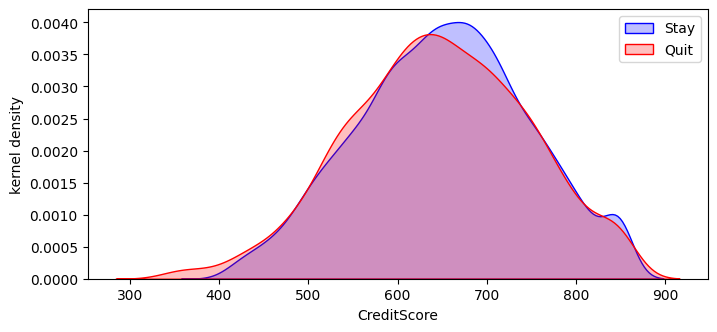

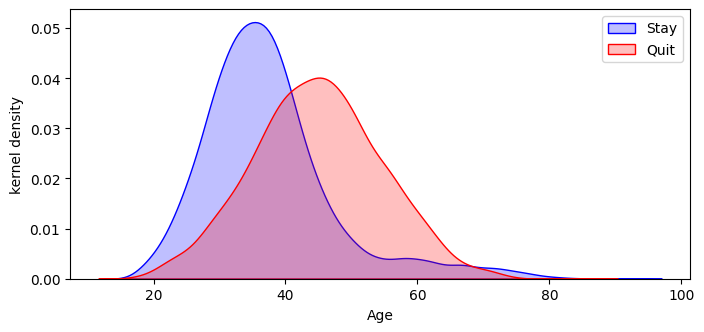

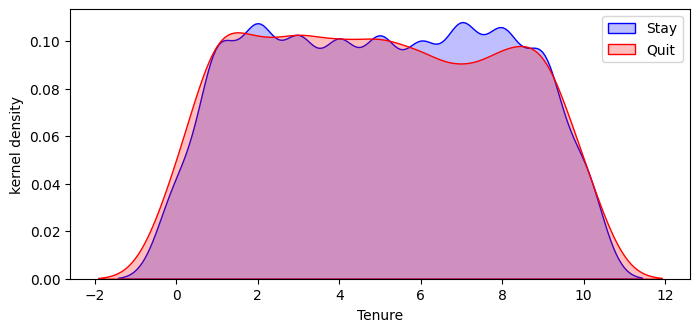

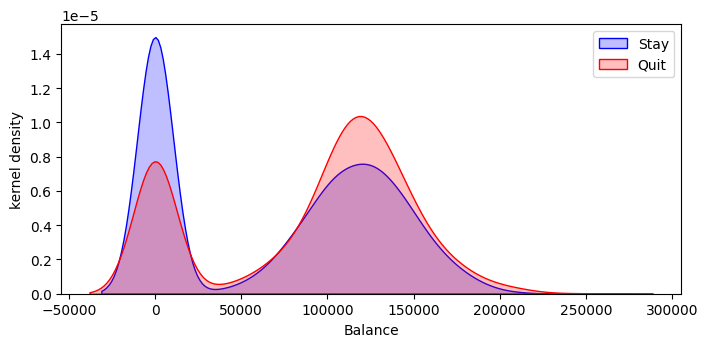

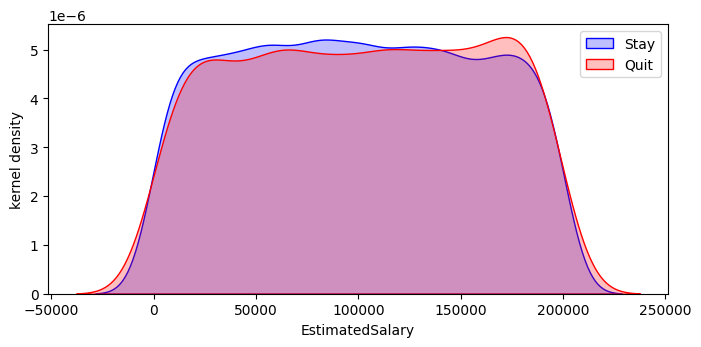

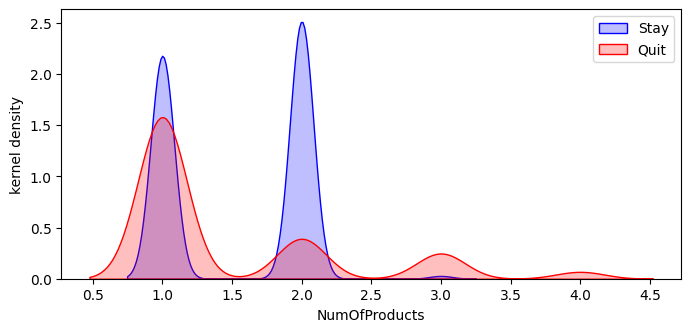

In [11]:
FeatureDistribution('CreditScore')
FeatureDistribution('Age')
FeatureDistribution('Tenure')
FeatureDistribution('Balance')
FeatureDistribution('EstimatedSalary')
FeatureDistribution('NumOfProducts')

In [12]:
churn_data['NumOfProducts'].min()

1

- As the inspection above, the only clear difference is in age. Note that, in the very right end, for customers above 75 years old, there are more people staying in the bank than quitting, while the distribution of people who quit ends around 75 - this aligns with my guess above that many old people quit the bank because they pass away.

- Despite staying or quitting, there are quite a lot customers that have zero balance. For these people, this bank is not their primary bank. The bank was probably offering some promotion plans when they opend the accounts. Before quitting the bank, customers usually transfer all the money first and waiting a period of time to see if the bank offers new promotion plans. Therefore, the customers with zero balance might have high potetioal to quit the bank.

- While most of the customers quitting the bank do not use additional product from the bank, more than of the customers staying in the bank use service/product like loans and portfolio investment in addition to regular account. This also aligns with my guess that the customers staying the bank are attracted by the loan products.

In [13]:
def CategoricalDistribution(feature,feature_str):
    temp = churn_data.groupby(['Exited', feature]).size().reset_index(name='counts')
    total_feature_0 = temp[temp[feature] == 0]['counts'].sum()
    total_feature_1 = temp[temp[feature] == 1]['counts'].sum()
    feature_churn_0 = temp[temp[feature] == 0][temp['Exited'] == 1]['counts'].values[0]
    feature_churn_1 = temp[temp[feature] == 1][temp['Exited'] == 1]['counts'].values[0]
    
    feature_churn_rate_0 = feature_churn_0 / total_feature_0
    feature_churn_rate_1 = feature_churn_1 / total_feature_1
    
    fig = plt.figure(figsize=(8,6))
    sns.barplot(temp, x = feature, y = 'counts', hue = 'Exited',
            palette={0: 'blue', 1: 'red'})

    plt.text(0.1, feature_churn_0, '{:.3f}'.format(feature_churn_rate_0), fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1)) 
    plt.text(1.1, feature_churn_1, '{:.3f}'.format(feature_churn_rate_1), fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1)) 
    plt.ylabel('Counts')
    plt.legend(title='Stay (0) or quit (1)')
    plt.title('Churn rate by {}'.format(feature_str))

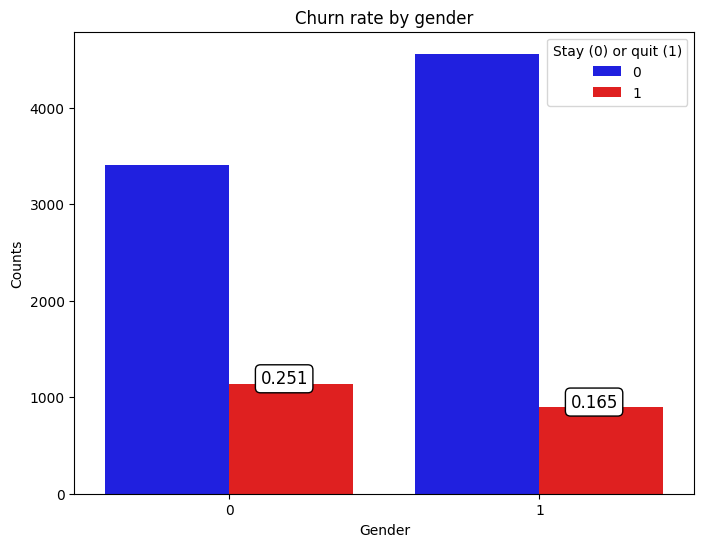

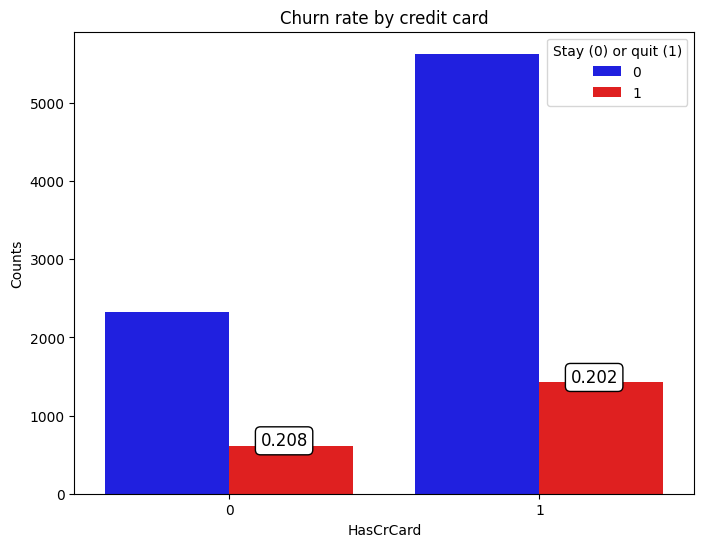

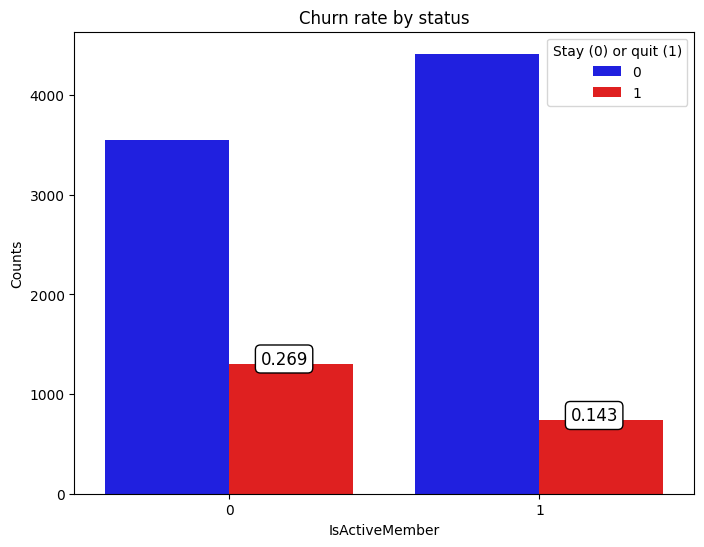

In [14]:
CategoricalDistribution('Gender', 'gender')
CategoricalDistribution('HasCrCard', 'credit card')
CategoricalDistribution('IsActiveMember', 'status')

While ***female*** and ***non-active*** customers have apparently higher churn rate, having a credit card or not seem to have similar churn rate.

Text(0.5, 1.0, 'Churn rate by country')

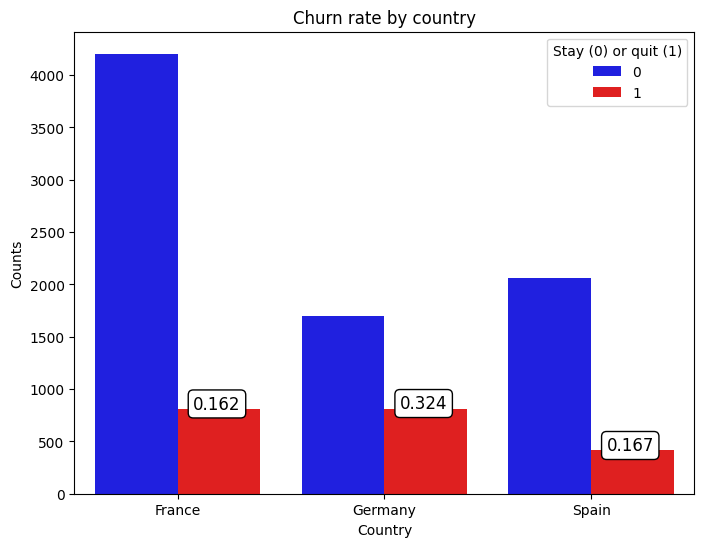

In [15]:
country = churn_data.groupby(['Exited', 'Geography']).size().reset_index(name='counts')
total_feature_Fra = country[country['Geography'] == 'France']['counts'].sum()
total_feature_Ger = country[country['Geography'] == 'Germany']['counts'].sum()
total_feature_Spa = country[country['Geography'] == 'Spain']['counts'].sum()

feature_churn_Fra = country[country['Geography'] == 'France'][country['Exited'] == 1]['counts'].values[0]
feature_churn_Ger = country[country['Geography'] == 'Germany'][country['Exited'] == 1]['counts'].values[0]
feature_churn_Spa = country[country['Geography'] == 'Spain'][country['Exited'] == 1]['counts'].values[0]
    
feature_churn_rate_Fra = feature_churn_Fra / total_feature_Fra
feature_churn_rate_Ger = feature_churn_Ger / total_feature_Ger
feature_churn_rate_Spa = feature_churn_Spa / total_feature_Spa
    
fig = plt.figure(figsize=(8,6))
sns.barplot(country, x = 'Geography', y = 'counts', hue = 'Exited', palette={0: 'blue', 1: 'red'})

plt.text(0.075, feature_churn_Fra, '{:.3f}'.format(feature_churn_rate_Fra), fontsize=12, 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1)) 
plt.text(1.075, feature_churn_Ger, '{:.3f}'.format(feature_churn_rate_Ger), fontsize=12, 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1)) 
plt.text(2.075, feature_churn_Spa, '{:.3f}'.format(feature_churn_rate_Spa), fontsize=12, 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1)) 

plt.ylabel('Counts')
plt.xlabel('Country')
plt.legend(title='Stay (0) or quit (1)')
plt.title('Churn rate by country')

***German customers*** are the main source for churn rate. Maybe the branches in Germany are not functioning well, or the bank's service/products do not fit German market.

#### 2.3 Correlation map

In [16]:
corr = churn_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']].corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


<Axes: >

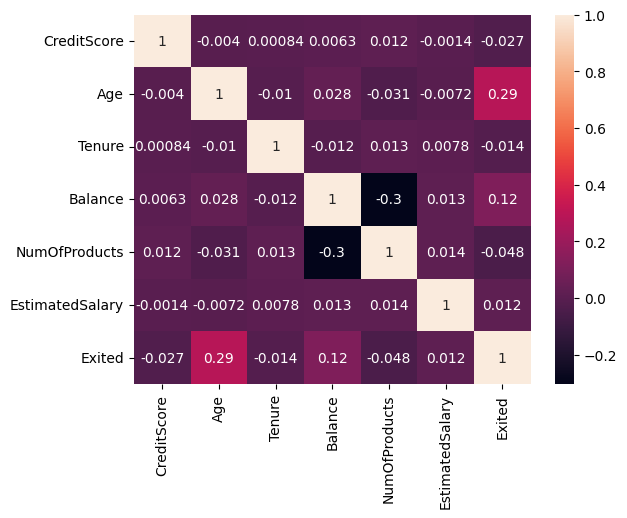

In [17]:
sns.heatmap(corr, annot=True)

- `Exit from the bank or not (churn)` correlates with `age` the most, just like what I mentioned above.
- `Balance` correlates with `churn` the second most. Although `NumOfProducts` does not correlate with `churn` explicitly, it significantly correlates with `Balance` in an opposite trend. This also supports the assumption that instead of using this bank as primary account for income or saving, many customers actually use the bank mainly for loan.
- It is worth noting that `EstimatedSalary` is unlikely to be a good estimate of salary. It is very likely that this estimate is based on the regular amounts monthly transfered into the account, which is ***hard to tell whether it is monthly salary or monthly loan return payment.***
- For many customers that keep using the bank and have non-zero `EstimatedSalary` but zero `Balance`, `EstimatedSalary` is likely to be loan return payment, instead of estimated salary.   

<Axes: xlabel='NumOfProducts', ylabel='counts'>

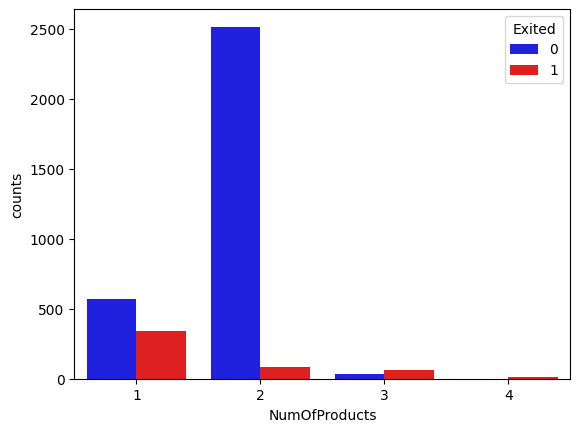

In [18]:
sns.barplot(churn_data[churn_data['Balance'] == 0].groupby(['NumOfProducts', 'Exited']).size().reset_index(name='counts'), x = 'NumOfProducts', y = 'counts', hue = 'Exited', palette={0: 'blue', 1: 'red'})

While most of the quitting customers use only one product, the staying customers use more than one products, this align with my assumptions that in addition to normal account, the staying customers have loans in the bank.

It is interesting that most of the customers having three or more bank products quit the bank. My guess is that ***they are people with ambitious plans and apply several loan products in the bank, but bankrupt and close the bank account in the end.***

#### 2.4 More rigorous analysis: K-S test and Z test

For each feature, we can actually check in a more quantitative way whether the distribution is different between customers quitting and staying with ***K-S test*** and ***Z test***. For numerical features, we use K-S test, and for categorical/binary features we use Z test.

In [19]:
from scipy.stats import ks_2samp
from statsmodels.stats.proportion import proportions_ztest

In [20]:
def KS_test(feature):

    dist_stay = churn_data.loc[churn_data['Exited']==0][feature]
    dist_churn = churn_data.loc[churn_data['Exited']==1][feature]
    print(feature+':')
    print(ks_2samp(dist_stay,dist_churn))


def Z_test(feature):

    dist_stay = churn_data.loc[churn_data['Exited']==0][feature]
    dist_churn = churn_data.loc[churn_data['Exited']==1][feature]
    n1 = len(dist_stay)
    p1 = dist_stay.sum()
    n2 = len(dist_churn)
    p2 = dist_churn.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print(feature+':')
    print('z-score = {}; p-value = {}'.format(z_score, p_value))

In [21]:
KS_test('CreditScore')
KS_test('Age')
KS_test('Tenure')
KS_test('Balance')
KS_test('NumOfProducts')
KS_test('EstimatedSalary')


CreditScore:
KstestResult(statistic=0.03584823549712708, pvalue=0.030059908312210937, statistic_location=651, statistic_sign=-1)
Age:
KstestResult(statistic=0.38660918924793986, pvalue=2.11904599621996e-217, statistic_location=41, statistic_sign=1)
Tenure:
KstestResult(statistic=0.019754102044488898, pvalue=0.5434473654076404, statistic_location=1, statistic_sign=-1)
Balance:
KstestResult(statistic=0.1494564545608614, pvalue=4.4608718125128645e-32, statistic_location=87505.47, statistic_sign=1)
NumOfProducts:
KstestResult(statistic=0.230194004166669, pvalue=6.577936228403955e-76, statistic_location=1, statistic_sign=-1)
EstimatedSalary:
KstestResult(statistic=0.02351751913966849, pvalue=0.32498799277316914, statistic_location=106149.48, statistic_sign=1)


As expected, `Age`, `Balance`, and `NumOfProducts` have p-values < 0.05, which means we can reject the null hypothesis that they have same distributions between quitting customers and staying customers. We will use them in model training.

Although `CreditScore` does not show the relevance and correlation above, it has a p-value < 0.05, which means `CreditScore` distributes differently between quitting customers and staying customers. We should also use `CreditScore` in models. 

In [22]:
Z_test('Gender')
Z_test('HasCrCard')
Z_test('IsActiveMember')

Gender:
z-score = 10.651248767347461; p-value = 1.720414987484119e-26
HasCrCard:
z-score = 0.7137765603039057; p-value = 0.4753653559706539
IsActiveMember:
z-score = 15.612827818890512; p-value = 5.9538525403637624e-55


Not surprisingly, as the p-values indicate, `Gender` and `IsActiveMember` have diffrent distributions between quitting customers adn staying customers, and `HasCrCard` has no difference between the two different groups. We will use `Gender` and `IsActiveMember` in model training.

## 3. Model training

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 

#### 3.1 Data preprocessing

Before we build machine-learning model, we need to drop irrelevant features and rescale the remaining features for machine learning. 

Based on the analysis above, we only use significantly relevant features, `Geography`, `Gender`, `Age`, `Balance`, `NumOfProducts`, and `IsActiveMember`.

In [24]:
churn_data_model = churn_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited']]

We need to encode categorical features (`Geography`) to numerical values.

In [25]:
# One-hot encoding
churn_data_model_onehot = pd.get_dummies(churn_data_model, columns=['Geography'])

churn_data_model_onehot.head()

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,0.00,1,1,1,True,False,False
1,608,0,41,83807.86,1,1,0,False,False,True
2,502,0,42,159660.80,3,0,1,True,False,False
3,699,0,39,0.00,2,0,0,True,False,False
4,850,0,43,125510.82,1,1,0,False,False,True


In [26]:
churn_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  int64  
 3   Age             10000 non-null  int64  
 4   Balance         10000 non-null  float64
 5   NumOfProducts   10000 non-null  int64  
 6   IsActiveMember  10000 non-null  int64  
 7   Exited          10000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 625.1+ KB


Only `Geography` has data type of object and need to be encoded.

In [27]:
churn_data_model_encode = churn_data_model.copy()

le = LabelEncoder()
churn_data_model_encode['Geography'] = le.fit_transform(churn_data_model.loc[:, 'Geography'])

churn_data_model_encode

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,0,0,42,0.00,1,1,1
1,608,2,0,41,83807.86,1,1,0
2,502,0,0,42,159660.80,3,0,1
3,699,0,0,39,0.00,2,0,0
4,850,2,0,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,1,39,0.00,2,0,0
9996,516,0,1,35,57369.61,1,1,0
9997,709,0,0,36,0.00,1,1,1
9998,772,1,1,42,75075.31,2,0,1


In `Geography`, 0 is France, 1 is Germany, and 2 is Spain.

We split the dataset into training and test sets, and then re-scale the features.

In [28]:
y_label = churn_data_model['Exited'].values
x_features_onehot = churn_data_model_onehot.drop(['Exited'], axis=1)
x_features_encode = churn_data_model_encode.drop(['Exited'], axis=1)

# Split into training/test
x_train_onehot, x_test_onehot, y_train, y_test =  train_test_split(x_features_onehot, y_label, test_size=0.3, random_state=0)
x_train_encode, x_test_encode, _, _ =  train_test_split(x_features_encode, y_label, test_size=0.3, random_state=0)

I set a same random state for one-hot and encoding datasets, so we could compare their model performance later.

I am going to use logistic regression, which is a distance-based model, and we need to re-scale the features for distance-based models.

In [29]:
# Re-scale
scaler = StandardScaler()

x_features_onehot_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_onehot), columns=x_train_onehot.columns)
x_features_onehot_test_scaled = pd.DataFrame(scaler.fit_transform(x_test_onehot), columns=x_test_onehot.columns)

For the following model training, we ***optimize the hyperparameters for every model with grid search.***

#### 3.2 Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Define searching grid
C_grid = 0.001*10**(np.arange(0, 1.01, 0.01)*3)
parameters = {"C": C_grid}

In [32]:
# Train the model and tuning
lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr,
                           param_grid=parameters,
                           scoring='roc_auc', 
                           n_jobs=-1)

grid_search_result = grid_search.fit(x_features_onehot_train_scaled, y_train)

In [33]:
print("Best ROC AUC score:", grid_search_result.best_score_)
print("Optimized value of C:", grid_search_result.best_params_)

Best ROC AUC score: 0.7636941829749693
Optimized value of C: {'C': 0.006456542290346557}


In [34]:
# Get the optimized model for evaluation
lr_optimized = grid_search_result.best_estimator_

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score

In [36]:
def PerformanceReport(optimized_model, x_train, x_test, y_train, y_test):
    y_train_predict = optimized_model.predict(x_train)
    y_train_predict_prob = optimized_model.predict_proba(x_train)[:, 1] 

    y_test_predict = optimized_model.predict(x_test)
    y_test_predict_prob = optimized_model.predict_proba(x_test)[:, 1]

    train_confusion_mat = confusion_matrix(y_train, y_train_predict)
    test_confusion_mat = confusion_matrix(y_test, y_test_predict)

    train_tn, train_fp, train_fn, train_tp = train_confusion_mat.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_mat.ravel()

    print('Training true positive:', train_tp)
    print('Training false positive:', train_fp)
    print('Training true negative:', train_tn)
    print('Training false negative:', train_fn)
    print('\n')
    print('Test true positive:', test_tp)
    print('Test false positive:', test_fp)
    print('Test true negative:', test_tn)
    print('Test false negative:', test_fn)
    
    print('\n')
    print('=======')
    print('ROC AUC score of training set:', roc_auc_score(y_train, y_train_predict_prob))
    print('ROC AUC score of test set:', roc_auc_score(y_test, y_test_predict_prob))
    print('=======')
    print('Classification accuracy of training set:', accuracy_score(y_train, y_train_predict))
    print('Classification accuracy of test set:', accuracy_score(y_test, y_test_predict))
    print('=======')
    print('Classification precision of training set:', precision_score(y_train, y_train_predict))
    print('Classification precision of test set:', precision_score(y_test, y_test_predict))
    print('=======')
    print('Classification recall of training set:', recall_score(y_train, y_train_predict))
    print('Classification recall of test set:', recall_score(y_test, y_test_predict))
    print('=======')
    print('Classification f1 score of training set:', f1_score(y_train, y_train_predict))
    print('Classification f1 score of test set:', f1_score(y_test, y_test_predict))

In [37]:
def PlotROC(optimized_model, x_test, y_test):
    y_test_predict_prob = optimized_model.predict_proba(x_test)[:, 1]
    fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_test_predict_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_predict_prob)

    fig = plt.figure()
    plt.plot(fpr_test, tpr_test, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Area = {:.2f})'.format(test_roc_auc))
    plt.show()

In [38]:
PerformanceReport(lr_optimized, x_features_onehot_train_scaled, x_features_onehot_test_scaled, y_train, y_test)

Training true positive: 222
Training false positive: 128
Training true negative: 5456
Training false negative: 1194


Test true positive: 92
Test false positive: 51
Test true negative: 2328
Test false negative: 529


ROC AUC score of training set: 0.765085221294093
ROC AUC score of test set: 0.7728751102474077
Classification accuracy of training set: 0.8111428571428572
Classification accuracy of test set: 0.8066666666666666
Classification precision of training set: 0.6342857142857142
Classification precision of test set: 0.6433566433566433
Classification recall of training set: 0.15677966101694915
Classification recall of test set: 0.14814814814814814
Classification f1 score of training set: 0.25141562853907135
Classification f1 score of test set: 0.24083769633507854


For this unbalanced dataset, in addition to ROC AUC score and accuracy, we focus more on ***recall***. In other words, comparing to correctly identifying customers that stay, we are more interested in detecting customers that would quit the bank - we want to further offer them special interest or portfolio investment plan to to keep them in the bank.

In [39]:
# Create a data frame to compare different models later 
model_comparison = pd.DataFrame({'model_name': ['Logistic regression'], 
                                 'ROC_AUC score': [0.77],
                                 'Accuracy': [0.81],
                                 'Recall': [0.15]})

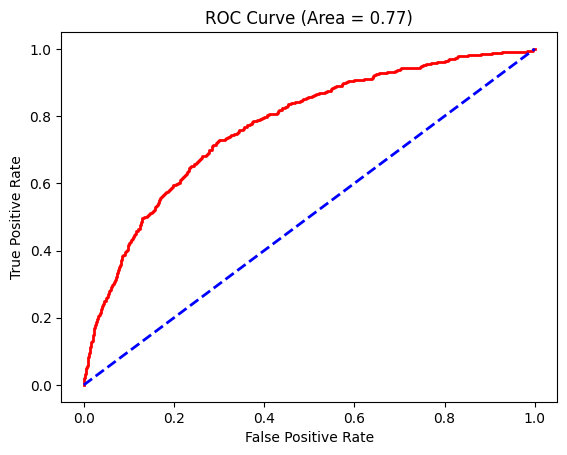

In [40]:
PlotROC(lr_optimized, x_features_onehot_test_scaled, y_test)

***Apparently, logistic regression is not working well for predicting churn on this data set.*** Even a null model that identify all the customer as staying can have a similar performance as logistic regression.

#### 3.3 K-nearest-neighbors (KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier 

In [42]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors':range(2, 20),
    'weights': ['uniform', 'distance']
}

Grid_KNN = GridSearchCV(knn, parameters, scoring='roc_auc')
Grid_KNN.fit(x_features_onehot_train_scaled, y_train)

knn_optimized = Grid_KNN.best_estimator_

In [43]:
print('Best score: ', Grid_KNN.best_score_)
print('Best parameters set: \n', Grid_KNN.best_params_)

Best score:  0.8334075126448252
Best parameters set: 
 {'n_neighbors': 19, 'weights': 'distance'}


In [44]:
PerformanceReport(knn_optimized, x_features_onehot_train_scaled, x_features_onehot_test_scaled, y_train, y_test)

Training true positive: 1414
Training false positive: 0
Training true negative: 5584
Training false negative: 2


Test true positive: 284
Test false positive: 116
Test true negative: 2263
Test false negative: 337


ROC AUC score of training set: 0.9999997470577761
ROC AUC score of test set: 0.8346850697765404
Classification accuracy of training set: 0.9997142857142857
Classification accuracy of test set: 0.849
Classification precision of training set: 1.0
Classification precision of test set: 0.71
Classification recall of training set: 0.998587570621469
Classification recall of test set: 0.4573268921095008
Classification f1 score of training set: 0.9992932862190813
Classification f1 score of test set: 0.5563173359451518


Apparently, this KNN model is over-fitting. However, comparing to logistic regression, we still get a huge improvement in both accuracy and recall.

In [45]:
model_comparison.loc[len(model_comparison)]=['KNN', 0.83, 0.85, 0.46]

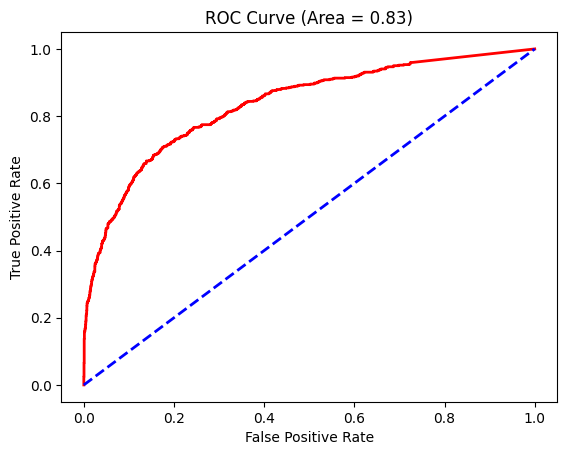

In [46]:
PlotROC(knn_optimized, x_features_onehot_test_scaled, y_test)

In [47]:
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46


***KNN is better than logistic regression.***

#### 3.4 Support vector machine (SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(probability=True)
C_grid = 10**(np.arange(0,1.01,0.01)*2)
parameters = {'C': C_grid}

Grid_SVM = GridSearchCV(svm, parameters, scoring='roc_auc', n_jobs=-1)
Grid_SVM.fit(x_features_onehot_train_scaled, y_train)

svm_optimized = Grid_SVM.best_estimator_

In [50]:
print('Best score: ', Grid_SVM.best_score_)
print('Best parameters set: \n', Grid_SVM.best_params_)

Best score:  0.8288046791219837
Best parameters set: 
 {'C': 1.6595869074375607}


In [51]:
PerformanceReport(svm_optimized, x_features_onehot_train_scaled, x_features_onehot_test_scaled, y_train, y_test)

Training true positive: 611
Training false positive: 147
Training true negative: 5437
Training false negative: 805


Test true positive: 276
Test false positive: 77
Test true negative: 2302
Test false negative: 345


ROC AUC score of training set: 0.8524832729307303
ROC AUC score of test set: 0.8353568766968624
Classification accuracy of training set: 0.864
Classification accuracy of test set: 0.8593333333333333
Classification precision of training set: 0.8060686015831134
Classification precision of test set: 0.7818696883852692
Classification recall of training set: 0.4314971751412429
Classification recall of test set: 0.4444444444444444
Classification f1 score of training set: 0.562097516099356
Classification f1 score of test set: 0.5667351129363449


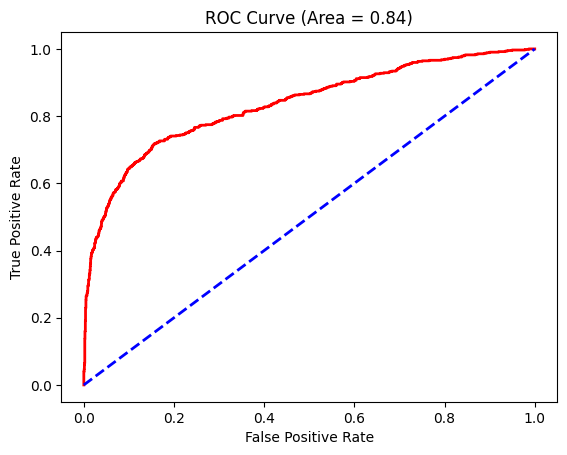

In [52]:
PlotROC(svm_optimized, x_features_onehot_test_scaled, y_test)

In [53]:
model_comparison.loc[len(model_comparison)]=['SVM', 0.84, 0.86, 0.44]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44


SVM takes much longer time than logistic regression and KNN, due to the distance computation between every data points and each candidate boundary. However, its performance is similar to KNN (KNN even has better recall). It is not efficient to use SVM.

#### Decision tree

For tree-based model, we will use label-encoded features without re-scaling.

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
treeDecision = DecisionTreeClassifier(random_state=47)

In [56]:
tree_parameters = {
    "criterion" : ["gini", "entropy"],
    "max_features": range(2, 7),
    "min_samples_split": [2, 3, 4],
    "max_depth": range(4, 11),
    "class_weight": [{0: 1, 1: 2}, {0: 1, 1: 1}]
}

Grid_tree = GridSearchCV(estimator=treeDecision,
                           param_grid=tree_parameters,
                           scoring='roc_auc',
                           n_jobs=-1)
Grid_tree.fit(x_train_encode, y_train)

tree_optimized = Grid_tree.best_estimator_

In [57]:
print('Best score: ', Grid_tree.best_score_)
print('Best parameters set: \n', Grid_tree.best_params_)

Best score:  0.8325369864415212
Best parameters set: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_split': 3}


In [58]:
PerformanceReport(tree_optimized, x_train_encode, x_test_encode, y_train, y_test)

Training true positive: 793
Training false positive: 436
Training true negative: 5148
Training false negative: 623


Test true positive: 355
Test false positive: 215
Test true negative: 2164
Test false negative: 266


ROC AUC score of training set: 0.8554509808087676
ROC AUC score of test set: 0.8310474975953712
Classification accuracy of training set: 0.8487142857142858
Classification accuracy of test set: 0.8396666666666667
Classification precision of training set: 0.645240032546786
Classification precision of test set: 0.6228070175438597
Classification recall of training set: 0.5600282485875706
Classification recall of test set: 0.571658615136876
Classification f1 score of training set: 0.5996219281663516
Classification f1 score of test set: 0.5961376994122586


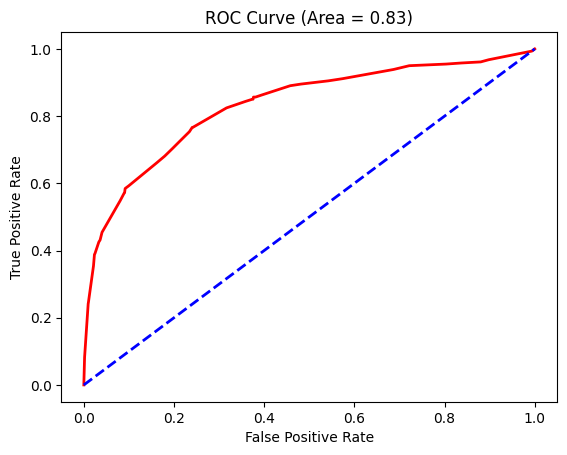

In [59]:
PlotROC(tree_optimized, x_test_encode, y_test)

In [60]:
model_comparison.loc[len(model_comparison)]=['Decision tree', 0.83, 0.84, 0.57]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57


Although decision tree seem to have a ROC AUC score not better than KNN, it actually has much better performance than KNN - ***decision tree has much better recall***, given that the dataset is unbalanced (~20% is churn (label:1), ~80% is staying (label:0)). 

#### 3.5 Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=20, random_state=17)
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_features": range(2, 7),
    "min_samples_split": [2, 3, 4],
    "max_depth": range(4, 11),
    "class_weight": [{0: 1, 1: 2}, {0: 1, 1: 1}]
}

Grid_RF = GridSearchCV(rf, parameters, scoring='roc_auc', n_jobs=-1)
Grid_RF.fit(x_train_encode, y_train)

rf_optimized = Grid_RF.best_estimator_

In [63]:
print('Best score: ', Grid_RF.best_score_)
print('Best parameters set: \n', Grid_RF.best_params_)

Best score:  0.8592322474219142
Best parameters set: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_split': 4}


In [64]:
PerformanceReport(rf_optimized, x_train_encode, x_test_encode, y_train, y_test)

Training true positive: 961
Training false positive: 195
Training true negative: 5389
Training false negative: 455


Test true positive: 364
Test false positive: 168
Test true negative: 2211
Test false negative: 257


ROC AUC score of training set: 0.949025122727567
ROC AUC score of test set: 0.8694647001845861
Classification accuracy of training set: 0.9071428571428571
Classification accuracy of test set: 0.8583333333333333
Classification precision of training set: 0.8313148788927336
Classification precision of test set: 0.6842105263157895
Classification recall of training set: 0.6786723163841808
Classification recall of test set: 0.5861513687600645
Classification f1 score of training set: 0.7472783825816485
Classification f1 score of test set: 0.6313963573287077


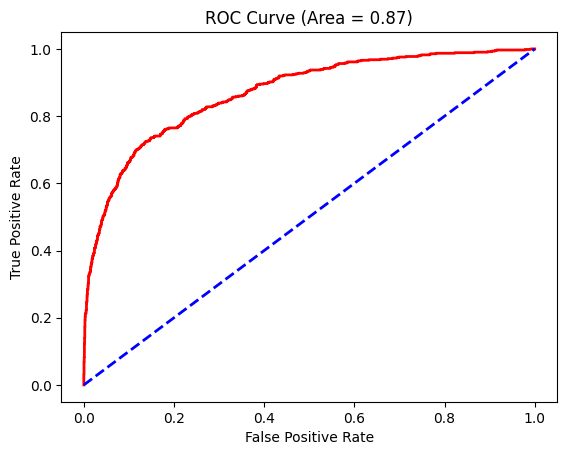

In [65]:
PlotROC(rf_optimized, x_test_encode, y_test)

In [66]:
model_comparison.loc[len(model_comparison)]=['Random forest', 0.87, 0.86, 0.59]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57
4,Random forest,0.87,0.86,0.59


Random forest has even better performance than decision tree, as expected (random forest is an ensemble of multiple decision trees, which reduces the risk of overfitting and is more likely to yield more robust and accurate predictions).

#### 3.6 Gradient boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gradientboost = GradientBoostingClassifier(random_state=20)

parameters = {
    "max_features": range(2, 7),
    "min_samples_split": [2, 3, 4],
    "max_depth": range(4, 11)
}

Grid_grb = GridSearchCV(gradientboost, parameters, scoring='roc_auc', n_jobs=-1)
Grid_grb.fit(x_train_encode, y_train)

grb_optimized = Grid_grb.best_estimator_

In [69]:
print('Best score: ', Grid_grb.best_score_)
print('Best parameters set: \n', Grid_grb.best_params_)

Best score:  0.8602846431092193
Best parameters set: 
 {'max_depth': 5, 'max_features': 2, 'min_samples_split': 4}


In [70]:
PerformanceReport(grb_optimized, x_train_encode, x_test_encode, y_train, y_test)

Training true positive: 754
Training false positive: 131
Training true negative: 5453
Training false negative: 662


Test true positive: 327
Test false positive: 124
Test true negative: 2255
Test false negative: 294


ROC AUC score of training set: 0.9163413829666683
ROC AUC score of test set: 0.8719996290678163
Classification accuracy of training set: 0.8867142857142857
Classification accuracy of test set: 0.8606666666666667
Classification precision of training set: 0.8519774011299435
Classification precision of test set: 0.7250554323725056
Classification recall of training set: 0.5324858757062146
Classification recall of test set: 0.5265700483091788
Classification f1 score of training set: 0.655367231638418
Classification f1 score of test set: 0.6100746268656716


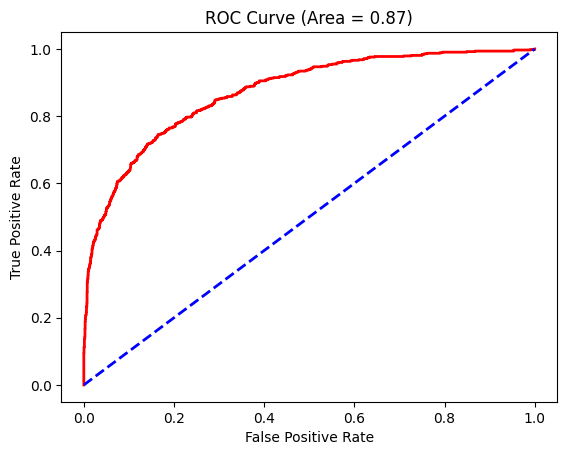

In [71]:
PlotROC(grb_optimized, x_test_encode, y_test)

In [72]:
model_comparison.loc[len(model_comparison)]=['Gradient boosting', 0.87, 0.86, 0.53]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57
4,Random forest,0.87,0.86,0.59
5,Gradient boosting,0.87,0.86,0.53


#### 3.7 AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
adaboost = AdaBoostClassifier(random_state=13)

parameters = {
    "n_estimators": [50, 75, 100]
}

Grid_AdaBoost = GridSearchCV(adaboost, parameters, scoring='roc_auc', n_jobs=-1)

Grid_AdaBoost.fit(x_train_encode, y_train)

AdaBoost_optimized = Grid_AdaBoost.best_estimator_

/Users/danichao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danichao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danichao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danichao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

In [75]:
print('Best score: ', Grid_AdaBoost.best_score_)
print('Best parameters set: \n', Grid_AdaBoost.best_params_)

Best score:  0.8429284219254398
Best parameters set: 
 {'n_estimators': 50}


In [76]:
PerformanceReport(AdaBoost_optimized, x_train_encode, x_test_encode, y_train, y_test)

Training true positive: 641
Training false positive: 217
Training true negative: 5367
Training false negative: 775


Test true positive: 319
Test false positive: 116
Test true negative: 2263
Test false negative: 302


ROC AUC score of training set: 0.8556414463034012
ROC AUC score of test set: 0.8598773216259554
Classification accuracy of training set: 0.8582857142857143
Classification accuracy of test set: 0.8606666666666667
Classification precision of training set: 0.747086247086247
Classification precision of test set: 0.7333333333333333
Classification recall of training set: 0.452683615819209
Classification recall of test set: 0.5136876006441223
Classification f1 score of training set: 0.5637642919964819
Classification f1 score of test set: 0.6041666666666666


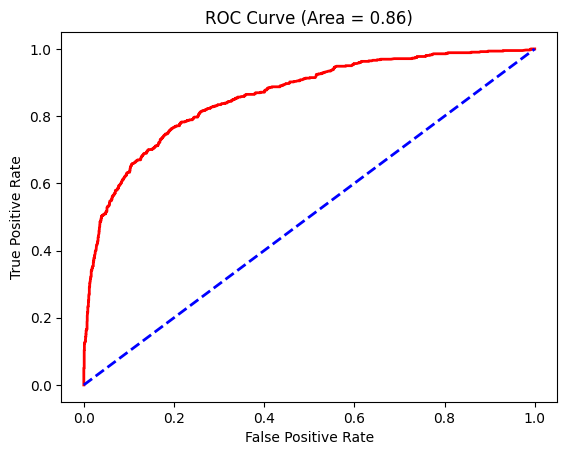

In [77]:
PlotROC(AdaBoost_optimized, x_test_encode, y_test)

In [78]:
model_comparison.loc[len(model_comparison)]=['AdaBossting', 0.86, 0.86, 0.51]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57
4,Random forest,0.87,0.86,0.59
5,Gradient boosting,0.87,0.86,0.53
6,AdaBossting,0.86,0.86,0.51


#### 3.8 XGBoost

In [79]:
from xgboost import XGBClassifier

In [80]:
xgb = XGBClassifier(random_state=5)
parameters = {
    'learning_rate': [0.025,0.05,0.1], 
    "max_depth": range(4, 11),
    'subsample': [0.25,0.5,1.0],
    'reg_lambda': [1,2,3], 
    'reg_alpha': [0,1,2],
    'scale_pos_weight': [1, 2, 3, 4]
}

warnings.filterwarnings('ignore', category=DeprecationWarning) 
Grid_XGB = GridSearchCV(xgb, parameters, scoring='roc_auc', n_jobs=-1)
Grid_XGB.fit(x_train_encode, y_train)

xgb_optimized = Grid_XGB.best_estimator_

In [81]:
print('Best score: ', Grid_XGB.best_score_)
print('Best parameters set: \n', Grid_XGB.best_params_)

Best score:  0.8620632860245332
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 3, 'scale_pos_weight': 2, 'subsample': 0.5}


In [82]:
PerformanceReport(xgb_optimized, x_train_encode, x_test_encode, y_train, y_test)

Training true positive: 1034
Training false positive: 295
Training true negative: 5289
Training false negative: 382


Test true positive: 396
Test false positive: 218
Test true negative: 2161
Test false negative: 225


ROC AUC score of training set: 0.947666696513849
ROC AUC score of test set: 0.865425736060091
Classification accuracy of training set: 0.9032857142857142
Classification accuracy of test set: 0.8523333333333334
Classification precision of training set: 0.7780285929270128
Classification precision of test set: 0.6449511400651465
Classification recall of training set: 0.730225988700565
Classification recall of test set: 0.6376811594202898
Classification f1 score of training set: 0.7533697632058288
Classification f1 score of test set: 0.6412955465587045


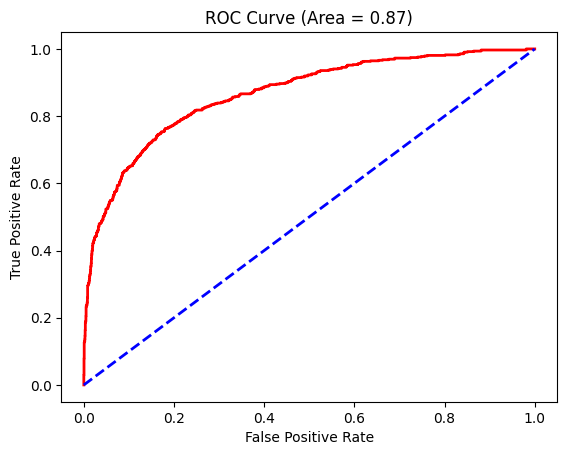

In [83]:
PlotROC(xgb_optimized, x_test_encode, y_test)

In [84]:
model_comparison.loc[len(model_comparison)]=['XGBoosting', 0.87, 0.85, 0.64]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57
4,Random forest,0.87,0.86,0.59
5,Gradient boosting,0.87,0.86,0.53
6,AdaBossting,0.86,0.86,0.51
7,XGBoosting,0.87,0.85,0.64


***XGBoosing has the best performance. Its recall is significantly better than the other models***

## 4. Model stacking

Now I would like to examine the results based on multiple models, instead of one single models. We could average the predicted probability to decide if a customer would quit or stay. Here, I will stack `Random forest`, `XGBoosting`, and `Decision tree` into one model and check the performance.

In [85]:
rf_prob = rf_optimized.predict_proba(x_test_encode)[:, 1]
tree_prob = tree_optimized.predict_proba(x_test_encode)[:, 1]
xgb_prob = xgb_optimized.predict_proba(x_test_encode)[:, 1] 

stack_prob = (rf_prob + tree_prob + xgb_prob) / 3
stack_y = stack_prob > 0.5

In [86]:
stack_confusion_mat = confusion_matrix(y_test, stack_y)

stack_tn, stack_fp, stack_fn, stack_tp = stack_confusion_mat.ravel()

print('Stacked model true positive:', stack_tp)
print('Stacked model false positive:', stack_fp)
print('Stacked model true negative:', stack_tn)
print('Stacked model false negative:', stack_fn)
    
print('\n')
print('=======')
print('Stacked model ROC AUC score:', roc_auc_score(y_test, stack_prob))
print('=======')
print('Stacked model accuracy of test set:', accuracy_score(y_test, stack_y))
print('=======')
print('Stacked model precision of test set:', precision_score(y_test, stack_y))
print('=======')
print('Stacked model recall of test set:', recall_score(y_test, stack_y))
print('=======')
print('Stacked model f1 score of test set:', f1_score(y_test, stack_y))

Stacked model true positive: 379
Stacked model false positive: 189
Stacked model true negative: 2190
Stacked model false negative: 242


Stacked model ROC AUC score: 0.8689624525927686
Stacked model accuracy of test set: 0.8563333333333333
Stacked model precision of test set: 0.6672535211267606
Stacked model recall of test set: 0.6103059581320451
Stacked model f1 score of test set: 0.6375105130361648


In [87]:
model_comparison.loc[len(model_comparison)]=['Stacked model', 0.87, 0.86, 0.61]
model_comparison

,model_name,ROC_AUC score,Accuracy,Recall
0,Logistic regression,0.77,0.81,0.15
1,KNN,0.83,0.85,0.46
2,SVM,0.84,0.86,0.44
3,Decision tree,0.83,0.84,0.57
4,Random forest,0.87,0.86,0.59
5,Gradient boosting,0.87,0.86,0.53
6,AdaBossting,0.86,0.86,0.51
7,XGBoosting,0.87,0.85,0.64
8,Stacked model,0.87,0.86,0.61


Although the stacked model is not the best, it would be the most stable and roust. It is cross-referenced and not affected by random state. Furthermore, we can optimize its selection threshold. 

The current threshold is 0.5, and we should lower the threshold for picking out more quitting customers from this unbalanced dataset.

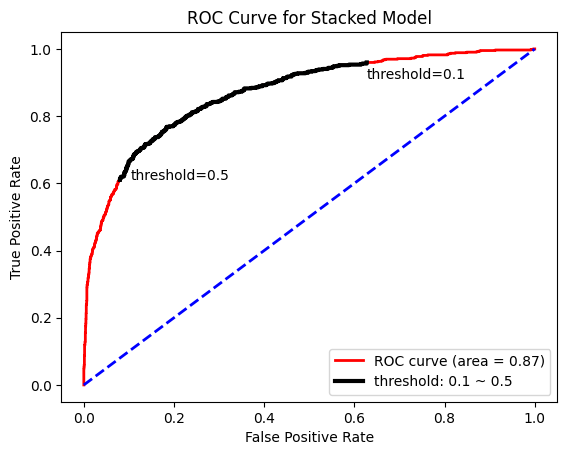

In [88]:
# Plot ROC curve
fpr_stack, tpr_stack, thresh_stack = roc_curve(y_test, stack_prob, pos_label=1)
stack_roc_auc = roc_auc_score(y_test, stack_prob)

# Highligh on threshold = 0.1 - 0.5
x1 = fpr_stack[(thresh_stack <= 0.5) & (thresh_stack >= 0.1)] 
x2 = tpr_stack[(thresh_stack <= 0.5) & (thresh_stack >= 0.1)]

fig = plt.figure()
plt.plot(fpr_stack, tpr_stack, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(stack_roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold: 0.1 ~ 0.5')
plt.text(x1[0]+0.025, x2[0], "threshold=0.5")
plt.text(x1[-1], x2[-1]-0.05, "threshold=0.1")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacked Model')
plt.legend(loc="lower right")
plt.show()

We can identify more quitting customers (increasing true-positive rate) by lowering the thresholds, but we also have to pay the price of the increasing false-positive rate. Although we are more interested in identifying quitting customers and focus more on recall, there is still a cost for mis-identifying staying customers as quitting customers. For example, if we offer increasing saving rate or zero-fee portfolio to quitting customers, we will pay extra money on the staying customers who are mis-identified as quitting customers and lose money. 

We need to define an ***utility function*** to quantify the trade-off. The utility function is defined as following:

- We lose one point for not identifying a quitting customer.
- We lose 0.3 point for mis-identifying a staying customer as a quitting customer. 

In [89]:
# Calculate utility/loss function at each threshold
loss = np.array([0. for x in range(len(thresh_stack))])

for ind, threshold in enumerate(thresh_stack):
    stack_y = stack_prob > threshold
    stack_confusion_mat = confusion_matrix(y_test, stack_y)

    __, stack_fp, stack_fn, __ = stack_confusion_mat.ravel()

    loss[ind] = 0.3*stack_fp + stack_fn

# Best threshold is where the minimum loss is
best_threshold = thresh_stack[np.where(loss == min(loss))[0]][0]

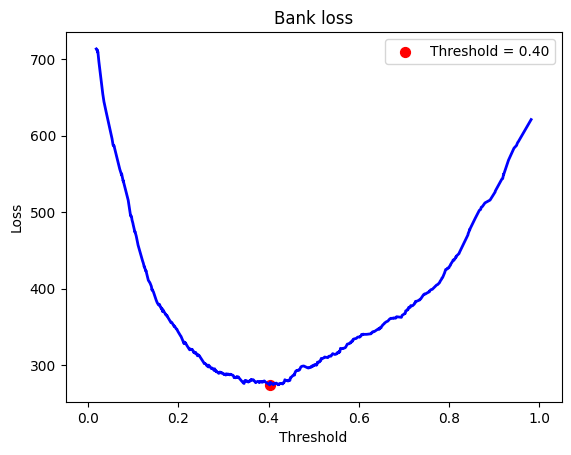

In [90]:
fig = plt.figure()
plt.plot(thresh_stack, loss, color='b', lw=2)
plt.scatter(best_threshold, min(loss), color='r', s=50, label='Threshold = {:.2f}'.format(best_threshold))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss')
plt.title('Bank loss')
plt.legend()
plt.show()

We will get the minimum loss at threshold around 0.4, and we can further check the performance metrics at this threshold.

In [91]:
# Calculate metrics at the best threshold
stack_y = stack_prob > best_threshold

stack_confusion_mat = confusion_matrix(y_test, stack_y)

stack_tn, stack_fp, stack_fn, stack_tp = stack_confusion_mat.ravel()

print('Stacked model true positive at best threshold:', stack_tp)
print('Stacked model false positive at best threshold:', stack_fp)
print('Stacked model true negative at best threshold:', stack_tn)
print('Stacked model false negative at best threshold:', stack_fn)
    
print('\n')
print('Stacked model accuracy at best threshold:', accuracy_score(y_test, stack_y))
print('Stacked model precision at best threshold:', precision_score(y_test, stack_y))
print('Stacked model recall at best threshold:', recall_score(y_test, stack_y))
print('Stacked model f1 score at best threshold:', f1_score(y_test, stack_y))

Stacked model true positive at best threshold: 444
Stacked model false positive at best threshold: 323
Stacked model true negative at best threshold: 2056
Stacked model false negative at best threshold: 177


Stacked model accuracy at best threshold: 0.8333333333333334
Stacked model precision at best threshold: 0.5788787483702738
Stacked model recall at best threshold: 0.714975845410628
Stacked model f1 score at best threshold: 0.6397694524495677


We achieve a much higher recall with the stacked model using threshold ~0.4. ***For the future, the bank could use this stacked mode with threshold ~0.4 to target their marketing/promotion plan.***

## 5. Feature importance

Since it is easy to check what role each feature plays in random forest and XGBoosting, I will show the imporatance of features here.

In [92]:
rf_importances = rf_optimized.feature_importances_

In [93]:
print("Feature importance ranking in random forest:")
for k,v in sorted(zip(rf_importances, x_test_encode.columns), reverse=True):
    print("{}: {:.2f}".format(v, k))

Feature importance ranking in random forest:
Age: 0.34
NumOfProducts: 0.23
Balance: 0.16
CreditScore: 0.13
IsActiveMember: 0.06
Geography: 0.05
Gender: 0.02


In [94]:
xgb_importances = xgb_optimized.feature_importances_

print("Feature importance ranking in XGBoosting:")
for k,v in sorted(zip(xgb_importances, x_test_encode.columns), reverse=True):
    print("{}: {:.2f}".format(v, k))

Feature importance ranking in XGBoosting:
NumOfProducts: 0.36
IsActiveMember: 0.16
Age: 0.16
Geography: 0.09
Balance: 0.08
Gender: 0.08
CreditScore: 0.07


As the correlation map has already indicated, `Age` and `NumOfProducts` are the most important features. This, again, aligns with my assumption that older people are not interested in the bank's loan products and they quit the bank possibly because unsatisfying saving rate and the lack of portfolio options. While random forest captures ***the relation between non-zero/zero balance and one/more than one products***, XGBoosting focus more on the status of active/non-active.

Both makes sense:
- Non-zero balance customers use the bank as their primary account and prefer the bank to offer them profit plans like higher saving rates and investment options.. As special saving rates and portfolio are not the focus of the bank, they use only one product from the bank, which is their normal account, and quit the bank in the end.

- Zero-balance customers use the bank only as their loan account, which indicates this bank's focus is loan product, and they only put money in the account in the monthly due of loan return payment. Therefore, many of them have zero balance most of the time.

- Non-active customers do not need the service from the bank anymore, so they tend to quit the bank.